In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the dataset, Analyze types of data

In [96]:
# load the dataset and have a preview

###!!! Grading criteria
# +1 points as long as you show how many float/int/object columns in the dataset
# df.info() is enough, prefer print(df.dtypes.to_string())
df = pd.read_csv("lab1_dataset.csv")
print(df.shape)
print(df.info())
df.head()

(2000, 552)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 552 entries, experimental_proprty to n6Ring
dtypes: float64(444), int64(105), object(3)
memory usage: 8.4+ MB
None


,experimental_proprty,MS_enc,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,...,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
0,3.54,PPENPINEAPLE42,5,1,0,83,7305.483137,1,2.105782,1,...,26.444444,2.995920,-0.508149,5.976320,16177.071020,1.102539,0,223.767000,0.903808,3
1,-1.18,PPENPINEAPLE42,11,0,3,114,9532.633527,0,4.605907,0,...,31.796610,9.996180,2.554415,0.000000,29893.511410,0.854039,1,225.916087,1.887922,3
2,3.69,PPENPINEAPLE42,5,1,2,69,5845.023999,0,1.422763,1,...,35.513514,3.773573,-0.113725,6.285975,17264.331087,0.793417,1,241.492298,1.098203,2
3,3.37,HTXPTDWTTWOBJR,9,1,3,105,7388.625069,0,0.000000,1,...,35.869565,6.699887,-0.114253,5.958016,20506.327989,0.421656,1,254.318903,1.164550,2
4,3.10,PPENPINEAPLE42,7,0,2,68,9082.560968,1,9.734779,0,...,21.018182,5.862455,1.664804,0.000000,22748.101433,1.602810,0,207.685522,0.492884,1


In [8]:
# we can see that there are three columns that have dtype "object"
# it may caused by non-numerical value/data in different shape/contains different types of data
# let's have a look on these columns
# find the name of those three columns:
df.dtypes[df.dtypes == 'O']

MS_enc    object
MIF       object
SMIF      object
dtype: object

In [11]:
# we can see that "MS_enc", "MIF", "SMIF" are Object columns
# since this is a relatively small dataset, you can just open the file and loot at these three columns
# Or print a part of them to check
print(df['MS_enc'][:10])
print(df['MIF'][:10])
print(df['SMIF'][:10])

0    PPENPINEAPLE42
1    PPENPINEAPLE42
2    PPENPINEAPLE42
3    HTXPTDWTTWOBJR
4    PPENPINEAPLE42
5    PPENPINEAPLE42
6    PPENPINEAPLE42
7    PPENPINEAPLE42
8    GOMNOOKGLZYEJT
9    PPENPINEAPLE42
Name: MS_enc, dtype: object
0    Computation failed
1                    59
2                    37
3                    46
4                    55
5                    44
6                    66
7                    59
8                    39
9                    21
Name: MIF, dtype: object
0         bigger
1    the_biggest
2            big
3         bigger
4         bigger
5            big
6    the_biggest
7    the_biggest
8            big
9            big
Name: SMIF, dtype: object


In [ ]:
# Now we know that "MS_enc", "SMIF" are string columns
# "MIF" is supposed to be a float column, but there are some "Computation failed" in it
# It remind us that we should replace the "Computation failed" to some better placeholder to make it a float array
# Also, it seems that there are too many "PPENPINEAPLE42" in column "MS_enc", so we probably need to detect elements that have too many duplications in string arraies.

### 2. Find and process missing and erroneous features

In [17]:
# check if there is missing values in each column

###!!! Grading criteria
# +0.5 points if only process the missing values in column "MW2"
# +1 point if process both "MW2" and "MIF"

# Pandas will automatically fill missing values with 'np.nan' for float/int columns
# find the column that has np.nan in it
print(df.columns[df.isnull().any()])

Index(['MW2'], dtype='object')

In [26]:
# We can see that only column 'MW2' were processed, but we know there are also placeholders in "MIF"
# So we need to manually replace those "Computation failed" in column "MIF" to np.nan
# after that we can see the dtype of column "MIF" changed to float
df["MIF"] = df["MIF"].replace("Computation failed",np.nan)
print(df["MIF"].dtype)

dtype('float64')

### 3. Find outliers

In [58]:
# We did not specify the definition of outliers, so you can define it by your own
# but in most cases people regard values that differ from the mean value by 3-6 standard deviationsas outliers

###!!! Grading criteria
# +1 point if find values that away from the mean value by n std for all numerical values

# check outliers for numerical columns
# define values that larger than 10*std as outliers
dn = df.select_dtypes(include=np.number)
((dn - dn.mean()) > 10*dn.std(axis=0)).sum()

experimental_proprty    0
nHetero                 0
nX                      0
C2SP3                   1
MPC5                    0
                       ..
AATSC1dv                0
nFARing                 0
AATS2v                  0
Xp-7dv                  0
n6Ring                  0
Length: 550, dtype: int64

### 4. Find highly correlated variables 

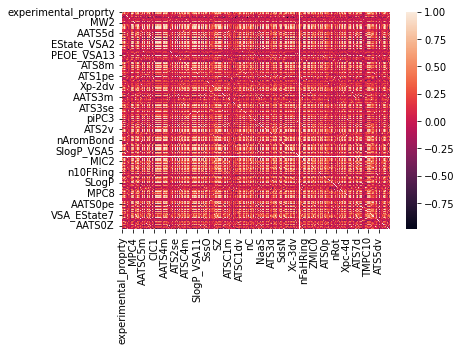

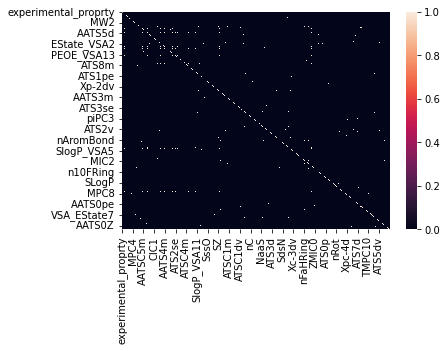

In [80]:
###!!! Grading criteria
# +0.5 points if show the correlation matrix (preferred in heatmap)
# +0.5 points if find at least one pair of highly correlated columns
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix)
plt.show()
# We can see that even if we filter correlation matrix with 0.99, there are still few pairs of columns that are correlated
sns.heatmap(((corr_matrix>0.99).astype(int) + (corr_matrix<-0.99).astype(int)).astype(bool))
plt.show()

### 5. Find if the target variable is correlated with any features

In [86]:
###!!! Grading criteria
# +1 point if saying there is no column that correlated to the targeted variable
# Or show a list of correlation score and saying that none of them are larger than 0.5

# Looking at the first column of the correlation matrix, we can see that there is nothing correlated to the experimental property (that 1 below means correlated to itself)
((corr_matrix>0.5).astype(int) + (corr_matrix<-0.5).astype(int)).astype(bool)['experimental_proprty'].sum()

1

### 6. Use PCA to plot data in 2D and color code by the target property

In [89]:
from sklearn.decomposition import PCA

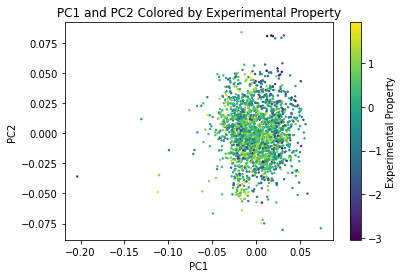

In [104]:
###!!! Grading criteria
# show at least one PCA scatter plot and claim that there is no patterns


dn = df.select_dtypes(include=np.number)
std_dn = np.array((dn - dn.mean())/dn.std())
std_dn[np.isnan(std_dn)] = 0
pca_2c = PCA(n_components=2).fit(std_dn.T)
plt.scatter(pca_2c.components_[0], pca_2c.components_[1], c=std_dn[:,0], s=2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 and PC2 Colored by Experimental Property")
cbar = plt.colorbar()
cbar.set_label("Experimental Property")

### 7. Prepare a short write-up describing your processing technics and choices above

In [ ]:
###!!! Grading criteria
# +1 points if summerize all of the findings above